<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/k_NN_joe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import ensemble
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from collections import Counter

IMPORT IRIS DATASET

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


SPLIT INTO X AND Y, THEN ALSO SPLIT INTO TRAINING AND TESTING DATA

In [ ]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, shuffle= True, random_state= 0)

x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
[ iris.data.shape, x_train.shape, x_test.shape ]

[(150, 4), (120, 4), (30, 4)]

NORMALIZE IRIS DATASET

In [ ]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

Euclidean Distance

In [ ]:
def distance_ecu(x_train, x_test_point):

  distances= [] 
  for row in range(len(x_train)): 
      current_train_point= x_train[row] 
      current_distance= 0

      for col in range(len(current_train_point)): 
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
        
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) 

  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

Find nearest neighbours

In [ ]:
def nearest_neighbors(distance_point, K):

    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    df_nearest= df_nearest[:K]
    return df_nearest

Classify point based on majority vote

In [ ]:
def voting(df_nearest, y_train):

    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   

    return y_pred

k_NN

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    y_pred=[]

    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  
      df_nearest_point= nearest_neighbors(distance_point, K) 
      y_pred_point    = voting(df_nearest_point, y_train)
      y_pred.append(y_pred_point)

    return y_pred  

ELBOW METHOD

In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

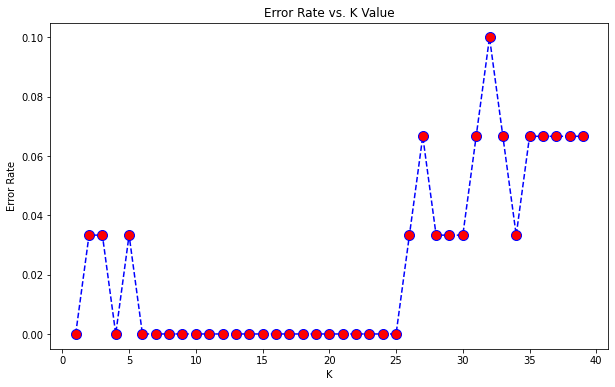

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The optimal value of k are 1,4,6 - 25

Retrain with best new k values

In [ ]:
# K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# K = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# K = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



k-NN regression from mglearn

In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7d5d4bfb2193e751a0158c183e3f6f65c61aea370e005f9005452d78cff61753
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


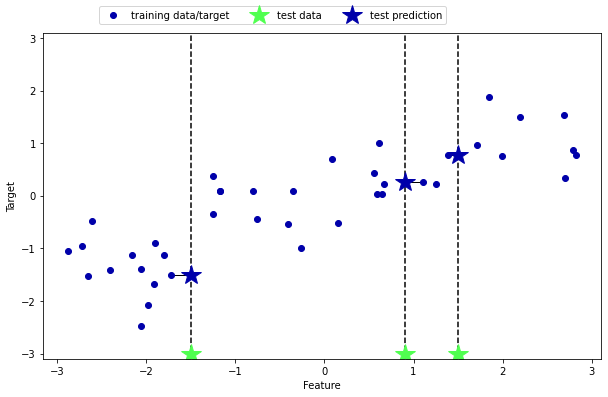

In [ ]:
import mglearn 
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
# split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# set the amount of neighbors to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model 

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:

reg.score(X_test,y_test)

0.8344172446249605